In [22]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("ILearning.jl");
rng = MersenneTwister(1234);

#### Defining the resolution factor and the Multistates

In [2]:
### Estados Possiveis
K = 8;
MultiStates = exp.(2*pi*collect(0:K-1)*im/K);

#### $N$ is the dimension of the memory elements and $P$ the number of fundamental memories. 

In [7]:
N = 200;
P = 20;

#### $\mathtt{NoiseValues}$ is the vector of noise levels, $\mathtt{Nsim}$ the number of simulations and $\mathtt{it}_{\mathtt{max}}$ the maximum number of iterations for the Hopfield neural network. 

In [8]:
### Noise Level Vector
#pr = range(0,1,length = 50);
n = 30
NoiseValues = 0:1/(n-1):1
Nnoise = length(NoiseValues);

## Noise Vector
Success_0 = zeros(Int64,(1,length(NoiseValues )));
Success_1 = zeros(Int64,(1,length(NoiseValues )));
Success_2 = zeros(Int64,(1,length(NoiseValues )));
Success_3 = zeros(Int64,(1,length(NoiseValues )));


### Number of Simulations
Nsim = 300

### Number of maximum iterations for the HNN model
it_max =1000

1000

#### Recall Experiment

In [9]:
# First Order W matrix
Wc = zeros(Complex,N,N);

# Complex Matrix 
U = Array{ComplexF64}(undef,(N,P));

@showprogress for s = 1:Nsim
    
# Complex Matrix 
    U = rand(rng,MultiStates,(N,P))


    W1 = ILearning.train(ILearning.first,U,nothing)
    W2 = ILearning.train(ILearning.second,U,nothing)
    Wc = ILearning.Correlation(U,nothing);
    Wp = ILearning.Projection(U)

    
    u1 = copy(U[:,1]);

    for i = 1:Nnoise

        ### Adding Noise
        
        xr = ILearning.noise(u1,MultiStates,NoiseValues[i])
        
        
        y = ILearning.Asy(W1,xr,ILearning.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_0[i] = Success_0[i] + 1
        end

        y = ILearning.Asy(W2,xr,ILearning.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_1[i] = Success_1[i] + 1
        end
        
        y = ILearning.Asy(Wc,xr,ILearning.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_2[i] = Success_2[i] + 1
        end
        
        y = ILearning.Asy(Wp,xr,ILearning.csign,K,it_max)
        
        Error = norm(u1-y)

        if Error<1.e-4
            Success_3[i] = Success_3[i] + 1
        end
        
        
    end
    
@save "JLDs/Complex_Csign_20K8.jld2"  NoiseValues Success_0 Success_1 Success_2 Success_3  Nsim P
     
end

Progress: 100%|█████████████████████████████████████████| Time: 0:12:23


#### Creating Plots

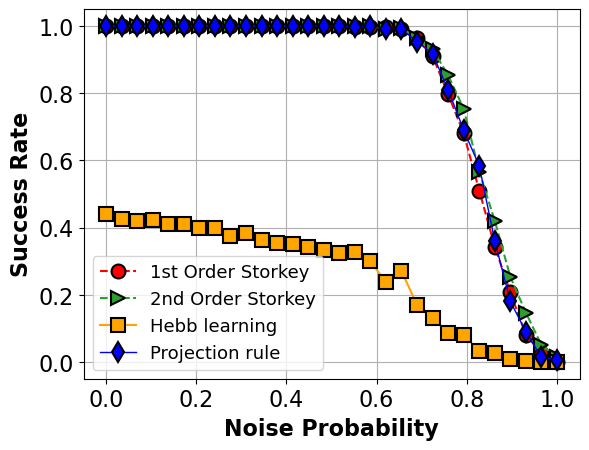

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [26]:
@load "JLDs/Complex_Csign_10K8.jld2" 
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
font0 = Dict(
        "font.size" => 18,
        "axes.labelweight" => "bold",
        "axes.labelsize" => 16,
        "xtick.labelsize" => 16,
        "ytick.labelsize" => 16,
        "legend.fontsize" => 13,
)
merge!(rcParams, font0)
plot(NoiseValues,Success_0[1,:]/Nsim,linewidth=1.5,color="red",linestyle ="dashed", marker="o",markersize = 10,
             markeredgewidth=1.5, markeredgecolor=(0,0,0),label = "1st Order Storkey")

plot(NoiseValues,Success_1[1,:]/Nsim,color="#2ca02c",linestyle ="dashed", marker=">",markersize = 10,markeredgewidth=1.5, markeredgecolor=(0,0,0),label = "2nd Order Storkey")

plot(NoiseValues,Success_2[1,:]/Nsim,color="orange",linestyle ="solid", marker="s",markersize = 10,markeredgewidth=1.5, markeredgecolor=(0,0,0),label = "Hebb learning")

plot(NoiseValues,Success_3[1,:]/Nsim,linewidth=1,color="blue",linestyle ="solid",markersize = 10,markeredgewidth=1.5, markeredgecolor=(0,0,0), marker="d",label = "Projection rule")

#title("Hopfield Neural Networks for P=40 and N=200")
xlabel("Noise Probability")
ylabel("Success Rate")

legend()
grid()
savefig("JLDs/All_CHNN_10K8.eps")
savefig("JLDs/All_CHNN_10K8.pdf")

savefig("Figures/ComplexCsign_10_K8.eps")
savefig("Figures/ComplexCsign_10_K8.eps")